# packages 

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from scipy.spatial import distance
import warnings
warnings.filterwarnings("ignore")

# Data

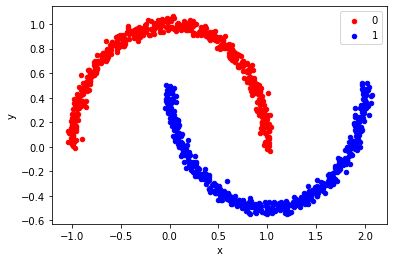

In [47]:
# generate 2d classification dataset
X, y= make_moons(n_samples=1000, noise=0.03)
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

# Implementation of DBSCAN

In [58]:
class dbscan:
    def __init__(self,eps,minpts,random_state=42):
        self.eps=eps
        self.minpts=minpts
        self.random_state=random_state
    
    
    def check_neighbours(self,distance_mat,points,cluster_no):
        while len(points) >0:
            #get a point 
            point=points.pop()
            #mark as visited
            self.visited[point]=1
            #calculate no of neighbours
            no_neighbours_idx=np.where(distance_mat[point] <self.eps)[0]
            if no_neighbours_idx.size -1<self.minpts:
                #border point
                pass
               
            else:
                #add neighbours
                self.idx[no_neighbours_idx]=cluster_no
                points.update(no_neighbours_idx)
                visited_idx=list(np.where(self.visited==1)[0])
                points=points.difference(visited_idx)
                #points = np.unique(np.concatenate((points,np.where(self.idx==cluster_no)[0]),0))
                 
                                                    
                                            
        return
    
    
    def predict(self):
        return self.idx
    
    
    def fit(self,x):
        np.random.RandomState(self.random_state)
        cluster_no=0
        self.idx=np.zeros(x.shape[0])
        self.visited=np.zeros(x.shape[0])
        # -1 -> noise , 0 -> not visited
        #distance matrix
        distance_mat=distance.cdist(x, x, 'euclidean') #size -> m*m
        while np.where(self.visited==0)[0].size !=0:
             #get a random point
            random_idx = np.random.randint(X.shape[0],size=1)
            # check if it's not visited
            if self.idx[random_idx[0]]==0:
                #mark as visited
                self.visited[random_idx[0]]=1
                #calculate no of neighbours
                no_neighbours_idx=np.where(distance_mat[random_idx[0]] <self.eps)[0]
                if (no_neighbours_idx.size -1)<self.minpts:
                    #mark as noise
                    self.idx[random_idx[0]]=-1
                    
                else:
                    #start a cluster
                    cluster_no+=1
                    #mark point and its neighbours
                    self.idx[no_neighbours_idx]=cluster_no
                    #check all the points recursively
                    points_idx=no_neighbours_idx
                    points_idx= points_idx[points_idx != random_idx[0]] 
                    self.check_neighbours(distance_mat,set(points_idx),cluster_no)
           
        return        
                  

In [59]:
model=dbscan(eps=0.7,minpts=9)

In [60]:
model.fit(df)
yhat = model.predict()
clusters = np.unique(yhat)
clusters

array([1., 2.])

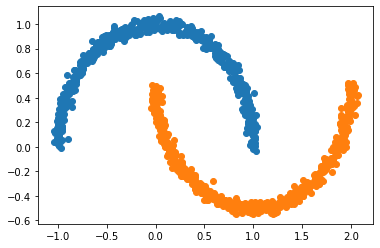

In [61]:
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

# DBSCAN in sklearn

In [63]:
# define the model
model = DBSCAN(eps=0.3, min_samples=9)

In [64]:
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)

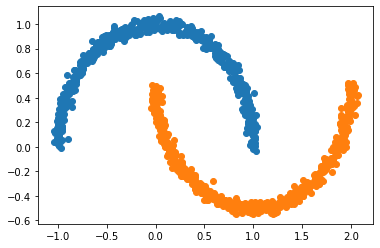

In [66]:
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()